# M4b: Splines and Generalized Additive Models

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import LSQUnivariateSpline, UnivariateSpline, BSpline
import statsmodels.api as sm
from statsmodels.gam.tests.test_penalized import df_autos
from statsmodels.gam.smooth_basis import BSplines
from statsmodels.gam.generalized_additive_model import GLMGam

from pygam import LinearGAM, LogisticGAM, GAM, s, l, te, f
from sklearn.preprocessing import scale
from pygam.datasets import wage, default

In [ ]:
df = pd.read_csv('mcycle.csv',index_col=0)

In [3]:
df

,times,accel
1,2.4,0.0
2,2.6,-1.3
3,3.2,-2.7
4,3.6,0.0
5,4.0,-2.7
...,...,...
129,53.2,-14.7
130,55.0,-2.7
131,55.0,10.7
132,55.4,-2.7


Text(0, 0.5, 'Acceleration (g)')

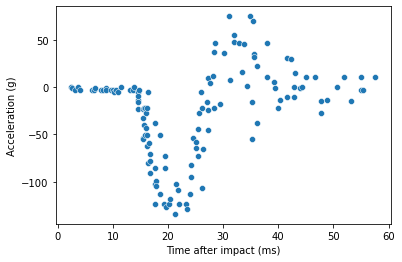

In [4]:
#sns.set_theme()
ax = sns.scatterplot(x = df.times, y = df.accel)
ax.set_xlabel('Time after impact (ms)')
ax.set_ylabel('Acceleration (g)')

## Revisiting the spline fit using `statsmodels`

In [24]:
df_autos
len(df_autos.weight.unique())

170

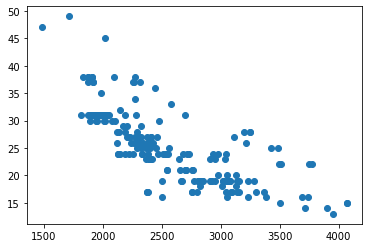

In [25]:
plt.scatter(df_autos.weight, df_autos.city_mpg)

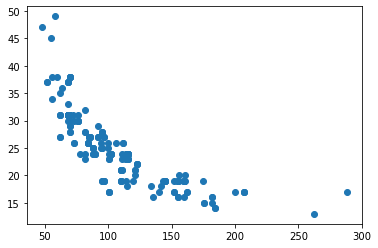

In [19]:
plt.scatter(df_autos.hp, df_autos.city_mpg)

In [23]:
x_spline = df_autos[['weight', 'hp']]#scale(df_autos[['weight', 'hp']])
bs = BSplines(x_spline, df=[12, 10], degree=[3, 3])
alpha = np.array([21833888.8, 6460.38479])

In [59]:
gam_bs = GLMGam.from_formula('city_mpg ~ weight + hp', data=df_autos, smoother=bs, alpha=alpha)

In [60]:
res_bs = gam_bs.fit()
res_bs.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               city_mpg   No. Observations:                  203
Model:                         GLMGam   Df Residuals:                   192.04
Model Family:                Gaussian   Df Model:                         9.96
Link Function:               identity   Scale:                          6.6701
Method:                         PIRLS   Log-Likelihood:                -475.02
Date:                Tue, 01 Mar 2022   Deviance:                       1280.9
Time:                        16:47:40   Pearson chi2:                 1.28e+03
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9959
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     57.5322      3.128     18.391      0.000      51.401      63.664
weight        -0.0031      0.001     -2.940      0.003      -0.005      -0.001
hp            -0.0958      0.010     -9.456      0.000      -0.116      -0.076
weight_s0     -2.0888      1.001     -2.086      0.037      -4.051      -0.126
weight_s1     -5.6952      1.693     -3.364      0.001      -9.013      -2.377
weight_s2     -7.6609      1.471     -5.208      0.000     -10.544      -4.778
weight_s3     -7.8012      1.314     -5.935      0.000     -10.377      -5.225
weight_s4     -7.8772      1.191     -6.612      0.000     -10.212      -5.542
weight_s5     -7.7382      1.105     -7.000      0.000      -9.905      -5.572
weight_s6     -7.4137      1.001     -7.407      0.000      -9.375      -5.452
weight_s7     -7.0816      0.839     -8.439      0.000      -8.726      -5.437
weight_s8     -5.0080      1.135     -4.411      0.000      -7.233      -2.783
weight_s9     -5.3711      1.144     -4.695      0.000      -7.613      -3.129
weight_s10    -5.7683      1.239     -4.656      0.000      -8.196      -3.340
hp_s0         -1.9632      0.595     -3.301      0.001      -3.129      -0.798
hp_s1         -4.6436      1.025     -4.531      0.000      -6.652      -2.635
hp_s2         -7.3503      1.134     -6.484      0.000      -9.572      -5.128
hp_s3         -8.4645      1.105     -7.658      0.000     -10.631      -6.298
hp_s4         -9.3152      1.022     -9.117      0.000     -11.318      -7.313
hp_s5         -8.4910      1.087     -7.812      0.000     -10.621      -6.361
hp_s6         -8.7081      2.041     -4.266      0.000     -12.709      -4.707
hp_s7         -2.1868      2.777     -0.787      0.431      -7.630       3.256
hp_s8          2.5937      1.839      1.411      0.158      -1.010       6.198
==============================================================================
"""

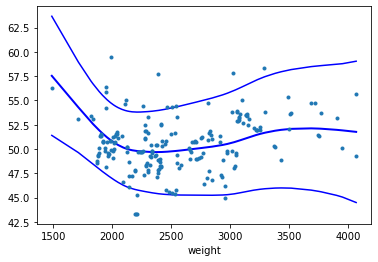

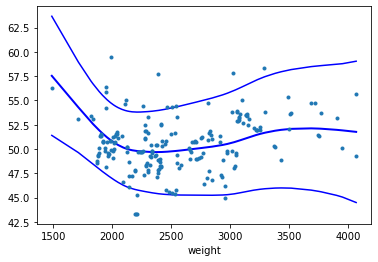

In [61]:
res_bs.plot_partial(0, cpr=True)

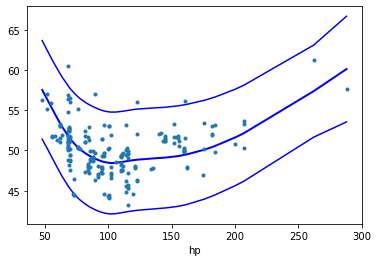

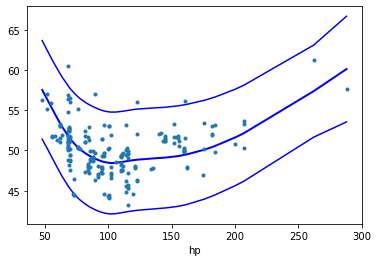

In [176]:
res_bs.plot_partial(1, cpr=True)

## Introduction to `pyGAM`

In pyGAM, the following functional forms are specified using "terms"

- l() linear terms: for terms like Xi
- s() spline terms
- f() factor terms
- te() tensor products
- intercept

### GAM with single predictor

The following functional forms are specified:
- intercept (default)
- `l()`: linear 
- `s()`: spline 
- `f()`: factor 
- `te()`: tensor products

We revisit fitting the motorcycle helmet crash data using a smoothing spline, but now using the `pyGAM` library

In [27]:
#Set knots
df2 = df.sort_values(by='times')

In [28]:
df2.head()

,times,accel
1,2.4,0.0
2,2.6,-1.3
3,3.2,-2.7
4,3.6,0.0
5,4.0,-2.7


In [47]:
gam0 = GAM(s(0),  distribution='normal', link='identity').fit(scale(df2.times), df2.accel) # .fit(X,y)
#gam0 = LinearGAM(s(0)).fit(scale(df2.times), df2.accel)

In [48]:
gam0.summary()

GAM                                                                                                       
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     10.2425
Link Function:                     IdentityLink Log Likelihood:                                  -954.5558
Number of Samples:                          133 AIC:                                             1931.5965
                                                AICc:                                             1933.876
                                                GCV:                                              605.0521
                                                Scale:                                            521.8021
                                                Pseudo R-Squared:                                   0.7922
Feature Function                  Lam

/tmp/ipykernel_1191374/3671198274.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam0.summary()


In [49]:
gam0.coef_

array([  10.32818397,    8.63643183,    7.63464692,   11.39949555,
         16.85336947,  -18.14567427,  -92.44143601, -114.64836672,
        -58.05902621,   21.50704144,   54.01912333,   35.58027548,
         17.42521867,   13.42409622,   11.94687151,    3.58141253,
          4.33293469,    9.86887234,   18.46237241,   27.75907936,
        -10.5350854 ])

### Model statistics

In [50]:
list(gam0.statistics_.keys())

['n_samples',
 'm_features',
 'edof_per_coef',
 'edof',
 'scale',
 'cov',
 'se',
 'AIC',
 'AICc',
 'pseudo_r2',
 'GCV',
 'UBRE',
 'loglikelihood',
 'deviance',
 'p_values']

In [51]:
gam0.statistics_['m_features']

1

In [52]:
gam0.terms

s(0) + intercept

In [53]:
XX = gam0.generate_X_grid(term=0)
pdep, confi = gam0.partial_dependence(term=0, X=XX, width=0.99)

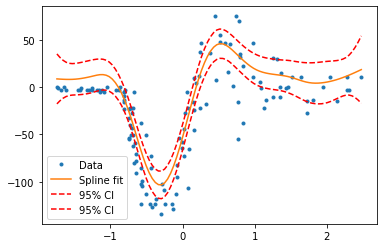

In [54]:
plt.plot(scale(df2.times), df2.accel, '.', label = 'Data') #, df2.times, ss(df2.times), '-')
plt.plot(XX[:, gam0.terms[0].feature], pdep, label='Spline fit')
plt.plot(XX[:, gam0.terms[0].feature], confi, c ='r', ls='--', label = '95% CI')
plt.legend()

### GAM with multiple predictors

In [56]:
X, y = wage() # variables in wage are: ['year', 'age', 'education']
gam = LinearGAM(s(0) + s(1) + f(2)).fit(X, y) # we use f(2) because the 3rd variable (education) is qualitative (i.e. a factor)
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     25.1911
Link Function:                     IdentityLink Log Likelihood:                                -24118.6847
Number of Samples:                         3000 AIC:                                            48289.7516
                                                AICc:                                           48290.2307
                                                GCV:                                             1255.6902
                                                Scale:                                           1236.7251
                                                Pseudo R-Squared:                                   0.2955
Feature Function                  Lam

/tmp/ipykernel_1191374/425502992.py:3: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


In [57]:
gam.terms

s(0) + s(1) + f(2) + intercept

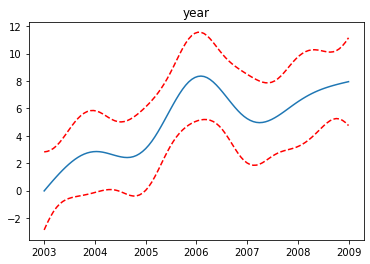

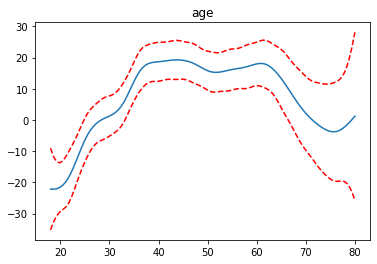

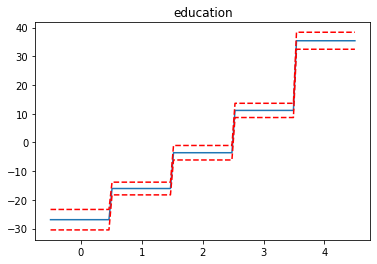

In [58]:
titles = ['year', 'age', 'education']
for i, term in enumerate(gam.terms):
    if term.isintercept:
        continue

    XX = gam.generate_X_grid(term=i)
    pdep, confi = gam.partial_dependence(term=i, X=XX, width=0.95)

    plt.figure()
    plt.plot(XX[:, term.feature], pdep)
    plt.plot(XX[:, term.feature], confi, c='r', ls='--')
    plt.title(titles[i])# repr(term))
    plt.show()